In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import sklearn

In [2]:
np.random.seed(128)

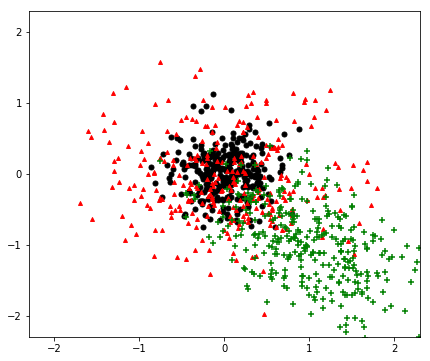

In [3]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

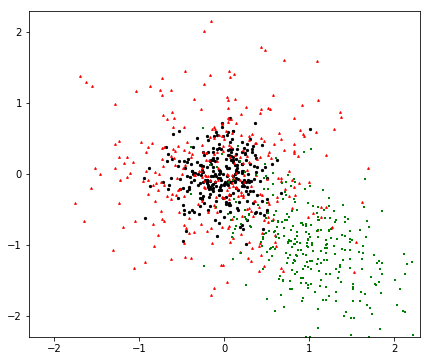

In [4]:
mu1 = [0, 0]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = [[0.1, 0], [0, 0.1]]
sigma2 = [[0.5, 0], [0, 0.5]]
sigma3 = [[0.3, -0.15], [-0.15, 0.3]]
p1 = 1.0/3.0
p2 = 1.0/3.0
p3 = 1- p1 - p2

def gen_data(N, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2):
    y = np.random.choice([1, 2, 3], N, p=[p1, p2, 1 - p1 - p2])
    X = np.zeros((N,2))
    N1 = np.count_nonzero(y == 1)
    N2 = np.count_nonzero(y == 2)
    N3 = np.count_nonzero(y == 3)
    X[y==1, ] = np.random.multivariate_normal(mu1, sigma1, N1)
    X[y==2, ] = np.random.multivariate_normal(mu2, sigma2, N2)
    X[y==3, ] = np.random.multivariate_normal(mu3, sigma3, N3)
    return X, y

X, y = gen_data(900, mu1, mu2, mu3, sigma1, sigma2, sigma3, p1, p2)

fig, ax = plt.subplots()
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=5)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=3)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=8)
fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

https://stackoverflow.com/questions/23204320/drawing-decision-boundary-of-two-multivariate-gaussian-in-python

https://stackoverflow.com/questions/19576761/drawing-decision-boundary-of-two-multivariate-gaussian

https://xavierbourretsicotte.github.io/Optimal_Bayes_Classifier.html

https://xavierbourretsicotte.github.io/LDA_QDA.html

https://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

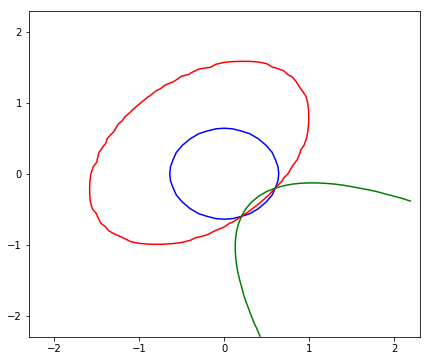

In [5]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


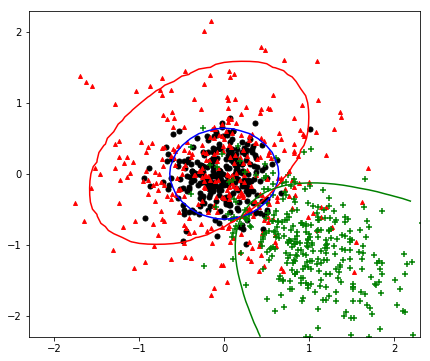

In [6]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)
plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)
Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
Z13 = decision_boudary(dist_1, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z13, [0], colors='red')
Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


In [7]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def compare_find_equals(number_a, number_b, number_c):
    if abs(number_a - number_b) / number_a <= 0.1 and abs(number_a - number_c) / number_a <= 0.1:
        print(number_a)
        return 1
    return 0
    
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)
matrix_a = np.vectorize(dist_1)(grid_X, grid_Y)
matrix_b = np.vectorize(dist_2)(grid_X, grid_Y)
matrix_c = np.vectorize(dist_3)(grid_X, grid_Y)
np.vectorize(compare_find_equals)(matrix_a, matrix_b, matrix_c)

0.21539279301848732
0.2153927930184836


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
def find_intersection_points(_px, _py, number_a):
    if dist_1(_px, _py) == number_a:
        print(_px, _py)
        return 1
    return 0

np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301848246)
print("\n######\n")
np.vectorize(find_intersection_points)(grid_X, grid_Y, 0.21539279301849612)


######



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
p_intersection_1 = (0.2, -0.6)
p_intersection_2 = (0.6, -0.2)

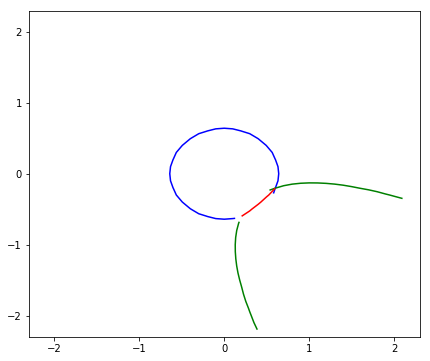

In [10]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

def decision_boudary(func_a, func_b, _grid_X, _grid_Y):
    return np.vectorize(func_a)(_grid_X, _grid_Y) - \
            np.vectorize(func_b)(_grid_X, _grid_Y)

# https://matplotlib.org/2.0.2/examples/pylab_examples/contourf_demo.html
def cut_off_decision_boudary_within_rec(_grid_X, _grid_Y, matrix):
    def cut_within_rec(_px, _py, _element):
        if(0.2 < _px < 0.6 - 0.05 and -0.6 < _py < -0.2 - 0.05):
            return np.nan
        else:
            return _element
    return np.vectorize(cut_within_rec)(_grid_X, _grid_Y, matrix)
        
feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)


feature_x_rec = np.arange(0.2, 0.61, 0.1)
feature_y_rec = np.arange(-0.6, -0.19, 0.1)
[grid_X_rec, grid_Y_rec] = np.meshgrid(feature_x_rec, feature_y_rec)

fig, ax = plt.subplots(1, 1)
_Z12 = decision_boudary(dist_1, dist_2, grid_X, grid_Y)
Z12 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z12)
ax.contour(grid_X, grid_Y, Z12, [0], colors='blue')
_Z23 = decision_boudary(dist_2, dist_3, grid_X, grid_Y)
Z23 = cut_off_decision_boudary_within_rec(grid_X, grid_Y, _Z23)
ax.contour(grid_X, grid_Y, Z23, [0], colors='green')

Z13 = decision_boudary(dist_1, dist_3, grid_X_rec, grid_Y_rec)
ax.contour(grid_X_rec, grid_Y_rec, Z13, [0], colors='red')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


https://stackoverflow.com/questions/48639028/how-to-plot-decision-boundaries-between-3-classes-using-discriminant-functions

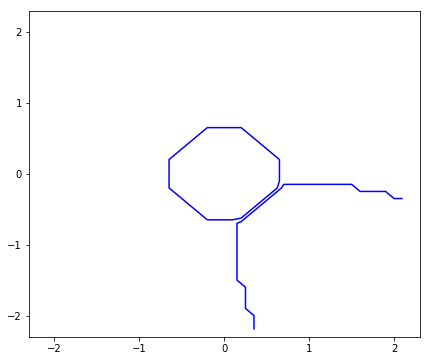

In [11]:
from scipy.stats import multivariate_normal

def dist_1(_px, _py):
    return multivariate_normal(mean=mu1, cov=sigma1).pdf([_px, _py])
def dist_2(_px, _py):
    return multivariate_normal(mean=mu2, cov=sigma2).pdf([_px, _py])
def dist_3(_px, _py):
    return multivariate_normal(mean=mu3, cov=sigma3).pdf([_px, _py])

# https://stackoverflow.com/questions/48639028/
def compare_and_assign_value(number_a, number_b, number_c):
    z = np.array([number_a, number_b, number_c])
    return np.argmax(z) + 1
    
def decision_boudary(func_a, func_b, func_c, _grid_X, _grid_Y):
    matrix_a = np.vectorize(func_a)(_grid_X, _grid_Y)
    matrix_b = np.vectorize(func_b)(_grid_X, _grid_Y)
    matrix_c = np.vectorize(func_c)(_grid_X, _grid_Y)
    return np.vectorize(compare_and_assign_value)(matrix_a, matrix_b, matrix_c)
    

feature_x = np.arange(-2.2, 2.2, 0.1)
feature_y = np.arange(-2.2, 2.2, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z_bayes = decision_boudary(dist_1, dist_2, dist_3, grid_X, grid_Y)
ax.contour(grid_X, grid_Y, Z_bayes, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()


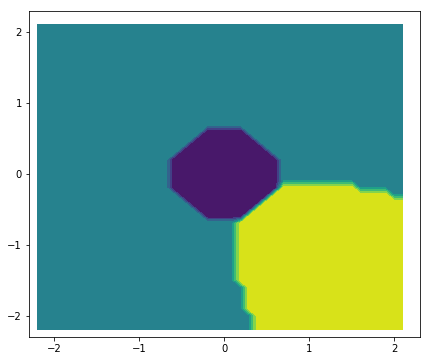

In [12]:
fig, ax = plt.subplots(1, 1)

ax.contourf(grid_X, grid_Y, Z_bayes)

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

We can't use dropout with sklearn's MLPClassifier.

https://datascience.stackexchange.com/questions/24275/scikit-mlpclassifier-vs-tensorflow-dnnclassifier

https://github.com/scikit-learn/scikit-learn/issues/6175

So we will use Keras instead.

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer, Dense, Dropout, \
                Activation, ActivityRegularization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import regularizers

In [14]:
import tensorflow as tf

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_train = scaler.transform(X)

In [16]:
y_train = to_categorical(y - 1, num_classes=3, dtype ="uint8")

In [17]:
(y - 1)[:10]

array([0, 2, 2, 0, 0, 1, 2, 2, 0, 1])

In [18]:
y[:10]

array([1, 3, 3, 1, 1, 2, 3, 3, 1, 2])

In [19]:
y_train[:10]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [20]:
X_train.shape

(900, 2)

In [21]:
X_train

array([[-0.3527991 ,  1.53501216],
       [ 1.89743866, -0.5159167 ],
       [ 0.42153937, -0.39814873],
       ...,
       [ 1.05051083,  2.60601066],
       [-0.60275719,  1.1997626 ],
       [-0.23024213,  0.95960032]])

In [22]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [23]:
num_labels = len(np.unique(y))
num_labels

3

https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

https://keras.io/api/layers/regularizers/

https://stackoverflow.com/questions/44495698/keras-difference-between-kernel-and-activity-regularizers

https://stackoverflow.com/questions/50630849/how-does-tf-keras-layers-activityregularization-work-and-how-to-use-it-correct

In [24]:
model = keras.Sequential(
    [
        InputLayer(2),
        Dense(20, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu", kernel_regularizer=regularizers.L2(0.5)),
        Dense(num_labels, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [27]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Train loss: 0.6299734115600586
Train accuracy: 0.7222222089767456


In [28]:
feature_x = np.arange(-2.3, 2.3, 0.1)
feature_y = np.arange(-2.3, 2.3, 0.1)
[grid_X, grid_Y] = np.meshgrid(feature_x, feature_y)

list_class_result_x = [[], [], []]
list_class_result_y = [[], [], []]

def get_predict_result(_px, _py):
    which = np.argmax(model.predict(
        scaler.transform([[_px, _py]]))[0])
    list_class_result_x[which].append(_px)
    list_class_result_y[which].append(_py)
    return which + 1

Z_neural_network = np.vectorize(get_predict_result)(grid_X, grid_Y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


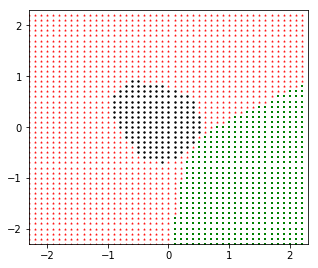

In [29]:
fig, ax = plt.subplots()
plt.scatter(np.array(list_class_result_x[0]), 
            np.array(list_class_result_y[0]), c='k', marker='o', s=2)
plt.scatter(np.array(list_class_result_x[1]), 
            np.array(list_class_result_y[1]), c='r', marker='^', s=1)
plt.scatter(np.array(list_class_result_x[2]), 
            np.array(list_class_result_y[2]), c='g', marker='+', s=3)
fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

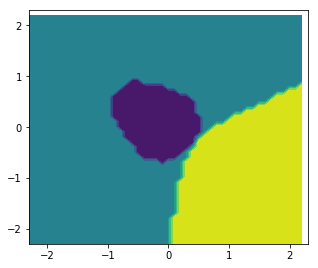

In [30]:
fig, ax = plt.subplots()

ax.contourf(grid_X, grid_Y, Z_neural_network)

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

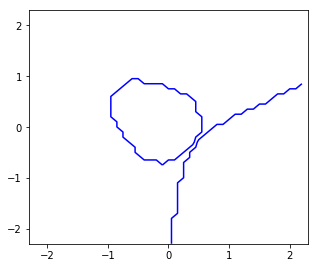

In [31]:
fig, ax = plt.subplots()

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(5, 4.3)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

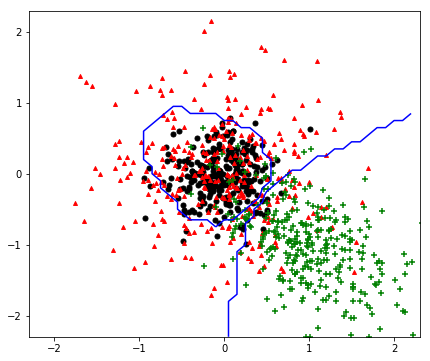

In [32]:
fig, ax = plt.subplots()

plt.scatter(X[y==1, 0], X[y==1, 1], c='k', marker='o', s=25)
plt.scatter(X[y==2, 0], X[y==2, 1], c='r', marker='^', s=15)
plt.scatter(X[y==3, 0], X[y==3, 1], c='g', marker='+', s=40)

ax.contour(grid_X, grid_Y, Z_neural_network, levels=[1.5, 2.5, 3.5], colors='b')

fig.set_size_inches(7, 6)
plt.xlim([-2.3, 2.3])
plt.ylim([-2.3, 2.3])
plt.show()

## Logistic Regression for Gaussian Data, which, of course, doesn't work

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logregc = LogisticRegression(solver='lbfgs', max_iter=1000)

In [35]:
X_train

array([[-0.3527991 ,  1.53501216],
       [ 1.89743866, -0.5159167 ],
       [ 0.42153937, -0.39814873],
       ...,
       [ 1.05051083,  2.60601066],
       [-0.60275719,  1.1997626 ],
       [-0.23024213,  0.95960032]])

In [36]:
y_train

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [37]:
logregc.fit(X_train, y)

LogisticRegression(max_iter=1000)

In [38]:
yc_pred = logregc.predict(X_train)

In [39]:
logregc.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 1000,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 2,
 'classes_': array([1, 2, 3]),
 'coef_': array([[-0.72221533,  0.49257679],
        [-0.72196462,  0.61102126],
        [ 1.44417995, -1.10359805]]),
 'intercept_': array([ 0.12070734,  0.21254808, -0.33325542]),
 'n_iter_': array([11])}

In [40]:
perfc = sklearn.metrics.confusion_matrix(y, yc_pred)
print(perfc)
err_logregc = np.mean(y != yc_pred)
print(err_logregc)
print(1 - sum(np.diag(perfc)) / float(len(y)))
assert(np.round(err_logregc, 5) == 
       np.round(1 - sum(np.diag(perfc)) / float(len(y)), 5))

[[  1 261  10]
 [  9 251  55]
 [  1  43 269]]
0.4211111111111111
0.4211111111111111


https://scikit-learn.org/stable/modules/multiclass.html

In [41]:
from sklearn.multiclass import OneVsRestClassifier

In [42]:
logregd = OneVsRestClassifier(LogisticRegression())

logregd.fit(X_train, y)

OneVsRestClassifier(estimator=LogisticRegression())

In [43]:
yd_pred = logregd.predict(X_train)

In [44]:
perfd = sklearn.metrics.confusion_matrix(y, yd_pred)
print(perfd)
err_logregd = np.mean(y != yd_pred)
print(err_logregd)
print(1 - sum(np.diag(perfd)) / float(len(y)))
assert(np.round(err_logregd, 5) == 
       np.round(1 - sum(np.diag(perfd)) / float(len(y)), 5))

[[  0 257  15]
 [  5 249  61]
 [  0  29 284]]
0.4077777777777778
0.4077777777777778


https://www.kaggle.com/code/satishgunjal/multiclass-logistic-regression-using-sklearn/notebook

In [45]:
logrege = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000)

logrege.fit(X_train, y)

ye_pred = logrege.predict(X_train)

perfe = sklearn.metrics.confusion_matrix(y, ye_pred)
print(perfe)
err_logrege = np.mean(y != ye_pred)
print(err_logrege)
print(1 - sum(np.diag(perfe)) / float(len(y)))
assert(np.round(err_logrege, 5) ==
       np.round(1 - sum(np.diag(perfe)) / float(len(y)), 5))

[[  0 257  15]
 [  5 249  61]
 [  0  29 284]]
0.4077777777777778
0.4077777777777778


### Plot the Neural Network structure weights

In [46]:
from keras.utils.vis_utils import plot_model

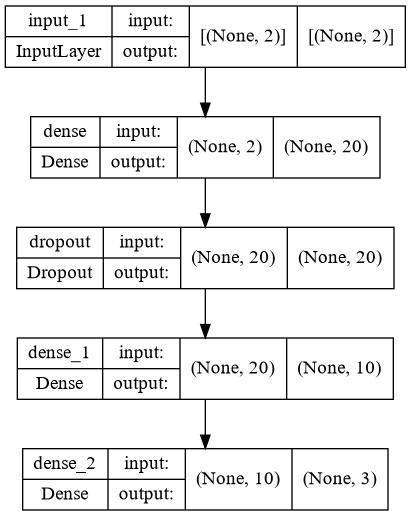

In [47]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [48]:
for layer in model.layers:
    print("\n\n////////////////////////////////////\n")
    print(layer.get_config())
    print("\n")
    print(layer.get_weights())




////////////////////////////////////

{'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 20, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


[array([[ 2.5478399 ,  1.0045981 ,  1.1770295 ,  1.0868802 ,  0.3518136 ,
         1.8945416 ,  1.7657534 , -2.3753836 ,  1.7283083 ,  1.0111266 ,
        -1.6837769 , -1.6302841 ,  1.6324382 , -1.9256754 , -1.476706  ,
         1.5922534 , -1.6362798 ,  1.3819366 ,  2.9091601 , -1.5773199 ],
       [-0.3390232 ,  0.9198526 , -1.4274904 , -1.4195079 ,  2.015391  ,
        -0.9988778 , -1.4362733 ,  2.236306  , -1.4109699 , -1.3209258 ,
        -1.447962  , -0.0959904 , -1.4335579 ,  1.935428  ,  1.899451  ,
        -1.3349541 , -1.4036843 ,  1.3871866 , -0.02765964,

In [49]:
model.layers[-1].get_weights()

[array([[-2.8608627e+00, -7.3781163e-01,  1.4197162e+00],
        [ 1.3506354e+00,  1.7414214e-01, -2.1008999e+00],
        [ 1.0370617e+00,  9.2115052e-02, -1.6959425e+00],
        [-1.4357994e+00, -2.2956598e-01,  9.1325045e-01],
        [-2.6046453e+00, -1.0433561e+00,  1.7759801e+00],
        [ 9.9582845e-01, -1.4802141e+00,  9.5636374e-01],
        [-2.7872159e+00,  3.3355122e+00, -1.3295614e+00],
        [-2.0678353e+00,  6.6176808e-04,  1.0009372e+00],
        [-1.4847972e+00,  1.0679102e+00,  1.5326926e+00],
        [-3.5300081e+00,  8.3379889e-01,  8.1517994e-01]], dtype=float32),
 array([ 0.2550113 ,  0.18634179, -0.47459057], dtype=float32)]

In [50]:
# prepare for Equation (38)

array_beta_0k_hat = model.layers[-1].get_weights()[1]
array_beta_0k_hat

array([ 0.2550113 ,  0.18634179, -0.47459057], dtype=float32)

In [51]:
# prepare for Equation (B.3)

array_beta_jk_hat = model.layers[-1].get_weights()[0]
array_beta_jk_hat

array([[-2.8608627e+00, -7.3781163e-01,  1.4197162e+00],
       [ 1.3506354e+00,  1.7414214e-01, -2.1008999e+00],
       [ 1.0370617e+00,  9.2115052e-02, -1.6959425e+00],
       [-1.4357994e+00, -2.2956598e-01,  9.1325045e-01],
       [-2.6046453e+00, -1.0433561e+00,  1.7759801e+00],
       [ 9.9582845e-01, -1.4802141e+00,  9.5636374e-01],
       [-2.7872159e+00,  3.3355122e+00, -1.3295614e+00],
       [-2.0678353e+00,  6.6176808e-04,  1.0009372e+00],
       [-1.4847972e+00,  1.0679102e+00,  1.5326926e+00],
       [-3.5300081e+00,  8.3379889e-01,  8.1517994e-01]], dtype=float32)

In [52]:
# Equation (38)

array_beta_0k_asterisk = array_beta_0k_hat - np.average(array_beta_0k_hat, axis=0)
array_beta_0k_asterisk

array([ 0.26609045,  0.19742095, -0.4635114 ], dtype=float32)

In [53]:
array_beta_0k_asterisk.shape

(3,)

In [54]:
# Equation (B.3)

array_beta_jk_asterisk = np.subtract(array_beta_jk_hat, np.average(array_beta_jk_hat, axis=1).reshape(10, 1))
array_beta_jk_asterisk

array([[-2.1345434 , -0.01149231,  2.1460357 ],
       [ 1.5426762 ,  0.36618292, -1.9088591 ],
       [ 1.2259836 ,  0.28103697, -1.5070206 ],
       [-1.1850944 ,  0.021139  ,  1.1639555 ],
       [-1.9806383 , -0.419349  ,  2.3999872 ],
       [ 0.8385024 , -1.6375401 ,  0.7990377 ],
       [-2.5267942 ,  3.595934  , -1.0691396 ],
       [-1.7124232 ,  0.35607386,  1.3563493 ],
       [-1.8567324 ,  0.69597507,  1.1607574 ],
       [-2.9029984 ,  1.4608086 ,  1.4421897 ]], dtype=float32)

In [55]:
array_beta_jk_asterisk.transpose().shape

(3, 10)

In [56]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337

# Check if the final output of the Neural Network is OK.

def get_array_softmax_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2, 3]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(tf.convert_to_tensor(y_pred), alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    output = keras.activations.softmax(tf.convert_to_tensor(y_pred.reshape(-1, 1)), axis=0).numpy()
    return output

print(get_array_softmax_j(model,  np.array([0, 0])))
print(get_array_softmax_j(model,  np.array([0.1, 0.1])))
print(get_array_softmax_j(model,  np.array([-0.3, 0.3])))
print(get_array_softmax_j(model,  np.array([-2, 2])))
print(get_array_softmax_j(model,  np.array([2, -2])))

[[0.41413919]
 [0.35820875]
 [0.22765206]]
[[0.38073095]
 [0.36342926]
 [0.25583979]]
[[0.65279544]
 [0.27531966]
 [0.07188491]]
[[0.29144686]
 [0.70225571]
 [0.00629742]]
[[5.86114108e-07]
 [1.40573372e-02]
 [9.85942077e-01]]


In [57]:
# https://alasko.medium.com/convert-simple-neuron-network-to-mathematician-notation-58a0d72f0337
# https://stackoverflow.com/questions/46432325/dropout-setting-layer-weights-array-to-empty
# https://stackoverflow.com/questions/63738681/what-layers-are-affected-by-dropout-layer-in-tensorflow
# https://stackoverflow.com/questions/46134891/why-an-extra-comma-in-the-shape-of-a-single-index-numpy-array
# https://stackoverflow.com/questions/27570756/difference-between-these-array-shapes-in-numpy
# https://stackoverflow.com/questions/32722843/transform-an-array-of-shape-n-to-a-numpy-array-of-shape-n-1
# https://www.codingem.com/numpy-at-operator/

# calculate array_phi and array_mu, as described in the paragraph below Equation (35)

def get_array_phi_j(_model, _one_input):
    y_pred = _one_input.copy()
    for i in [0, 2]: # Dropout layer should not be taken into consideration
        _layer = _model.layers[i]
        _W = _layer.get_weights()
        if i == 0:
            y_pred = y_pred @ _W[0] + _W[1]
        else:
            _relu = keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()
            y_pred =  _relu @ _W[0] + _W[1]
    return keras.activations.relu(y_pred, alpha=0.0, max_value=None, threshold=0.0).numpy()

def get_array_mu_j(_model, _array_input):
    list_of_array_phi = []
    for _one_input in _array_input:
        list_of_array_phi.append(get_array_phi_j(_model, _one_input))
    array_of_array_phi = np.array(list_of_array_phi)
    avg = np.average(array_of_array_phi, axis=0)
    return avg

print(get_array_phi_j(model, np.array([0, 0])))
print(get_array_phi_j(model, np.array([0, 0])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).shape)
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1))
print(get_array_mu_j(model, np.array([[0, 0], [1, 1]])).reshape(-1, 1).shape)
print(get_array_mu_j(model, X_train))

[0.13497147 0.46891521 0.45821555 0.07485564 0.14867546 0.4656379
 0.         0.10423719 0.13514036 0.2043237 ]
(10,)
[0.17975275 0.40390873 0.42086007 0.09692678 0.180493   0.42929782
 0.09715936 0.13551325 0.1797957  0.27224373]
(10,)
[[0.17975275]
 [0.40390873]
 [0.42086007]
 [0.09692678]
 [0.180493  ]
 [0.42929782]
 [0.09715936]
 [0.13551325]
 [0.1797957 ]
 [0.27224373]]
(10, 1)
[0.19127865 0.38277962 0.3922677  0.10366975 0.20010017 0.41612297
 0.14749491 0.14795186 0.17267935 0.26992155]


In [58]:
# Equation (38)

def get_array_alpha_jk_asterisk(_model, _array_input):
    array_mu_j = get_array_mu_j(_model, _array_input).reshape(-1, 1)
    # https://stackoverflow.com/questions/47960938/how-to-replicate-a-row-of-an-array-with-numpy
    first_term_in_parentheses = array_beta_0k_asterisk.reshape(-1, 1)
    matrix_transformed_mu_j = np.repeat(array_mu_j, repeats = [10], axis=1)
    second_term_in_parentheses = matrix_transformed_mu_j @ array_beta_jk_asterisk
    first_term = np.repeat(first_term_in_parentheses, repeats = [10], axis=1).transpose() - second_term_in_parentheses
    second_term = matrix_transformed_mu_j @ array_beta_jk_asterisk
    return 1.0 / 10.0 * first_term - second_term # shape: (10, 3)

print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])))
print(get_array_alpha_jk_asterisk(model, np.array([[0, 0], [1, 1]])).shape)

[[ 2.14072933 -0.91131348 -1.22941587]
 [ 4.77708799 -2.07236209 -2.70472594]
 [ 4.97645724 -2.16016402 -2.81629326]
 [ 1.16659085 -0.48230427 -0.68428659]
 [ 2.14943564 -0.91514772 -1.23428793]
 [ 5.07569587 -2.20386857 -2.87182734]
 [ 1.16932632 -0.48350897 -0.68581736]
 [ 1.62041676 -0.68216856 -0.93824822]
 [ 2.14123448 -0.91153594 -1.22969855]
 [ 3.22854063 -1.39038403 -1.83815663]]
(10, 3)


In [59]:
array_alpha_jk_asterisk = get_array_alpha_jk_asterisk(model, X_train)
print(array_alpha_jk_asterisk)

[[ 2.2762885  -0.97101354 -1.30527498]
 [ 4.52858285 -1.96292078 -2.56566211]
 [ 4.64017472 -2.01206568 -2.62810908]
 [ 1.24589678 -0.51723049 -0.7286663 ]
 [ 2.38004079 -1.0167059  -1.36333491]
 [ 4.92074296 -2.13562753 -2.78511547]
 [ 1.76133627 -0.74422931 -1.01710697]
 [ 1.76671057 -0.74659614 -1.02011444]
 [ 2.05753716 -0.87467576 -1.18286141]
 [ 3.20122876 -1.37835592 -1.82287287]]


In [60]:
# Equation (25)

def get_array_w_jk(_model, px, py):
    array_phi_j = get_array_phi_j(_model, [px, py]).reshape(-1, 1)
    # https://stackoverflow.com/questions/47960938/how-to-replicate-a-row-of-an-array-with-numpy
    matrix_transformed_mu_j = np.repeat(array_phi_j, repeats = [10], axis=1)
    first_term = matrix_transformed_mu_j @ array_beta_jk_asterisk
    return first_term + array_alpha_jk_asterisk # shape: (10, 3)

print(get_array_w_jk(model, 0, 0))

[[ 8.33165217e-01 -3.35464097e-01 -4.97701126e-01]
 [-4.85087624e-01  2.45092582e-01  2.39995046e-01]
 [-2.59094383e-01  1.45565480e-01  1.13528906e-01]
 [ 4.45535675e-01 -1.64752598e-01 -2.80783081e-01]
 [ 7.90393590e-01 -3.16627534e-01 -4.73766063e-01]
 [-5.78863154e-02  5.69537323e-02  9.32583733e-04]
 [ 1.76133627e+00 -7.44229310e-01 -1.01710697e+00]
 [ 6.52200092e-01 -2.55767313e-01 -3.96432784e-01]
 [ 6.12608035e-01 -2.38331028e-01 -3.74277012e-01]
 [ 1.01658713e+00 -4.16242849e-01 -6.00344292e-01]]


In [61]:
print(get_array_w_jk(model, 2, -2))

[[-5.97574765  2.66317146  3.31257624]
 [ 4.52858285 -1.96292078 -2.56566211]
 [ 4.64017472 -2.01206568 -2.62810908]
 [-3.08633843  1.39067975  1.69565871]
 [-6.14319257  2.73691397  3.40627865]
 [ 0.01487438  0.02491003 -0.0397844 ]
 [-1.36799697  0.6339246   0.73407238]
 [-3.98641075  1.78707032  2.19934047]
 [-3.92777117  1.76124553  2.16652567]
 [-5.58027343  2.48900518  3.0912683 ]]


In [62]:
print(get_array_w_jk(model, -2, 2))

[[ 2.2762885  -0.97101354 -1.30527498]
 [-2.28223904  1.03655551  1.24568354]
 [-1.56977126  0.72278572  0.84698556]
 [ 1.24589678 -0.51723049 -0.7286663 ]
 [ 2.38004079 -1.0167059  -1.36333491]
 [ 2.08183048 -0.88537451 -1.19645599]
 [-3.30951873  1.48896803  1.82055073]
 [ 1.76671057 -0.74659614 -1.02011444]
 [ 2.05753716 -0.87467576 -1.18286141]
 [ 3.20122876 -1.37835592 -1.82287287]]


In [63]:
print(get_array_w_jk(model, 0.1, 0.1))

[[ 0.71848203 -0.28495778 -0.43352425]
 [-0.35204732  0.18650182  0.1655455 ]
 [-0.17878569  0.11019765  0.06858805]
 [ 0.4106961  -0.1494093  -0.2612868 ]
 [ 0.69051339 -0.27264044 -0.41787296]
 [-0.06445045  0.05984457  0.00460588]
 [ 1.76133627 -0.74422931 -1.01710697]
 [ 0.6081823  -0.23638194 -0.37180036]
 [ 0.57144066 -0.22020098 -0.35123969]
 [ 0.97069545 -0.39603222 -0.57466324]]


In [64]:
print(get_array_w_jk(model, -0.3, 0.3))

[[ 1.70890409 -0.72113825 -0.98776585]
 [-1.05378344  0.49554541  0.55823803]
 [-0.64708257  0.31643493  0.33064765]
 [ 0.85781091 -0.34631803 -0.51149289]
 [ 1.66339603 -0.70109657 -0.96229948]
 [ 0.21365487 -0.06263262 -0.15102225]
 [ 1.46483324 -0.6136498  -0.85118345]
 [ 1.07337171 -0.44125069 -0.63212102]
 [ 1.14900148 -0.47455794 -0.67444355]
 [ 1.74337963 -0.73632123 -1.00705841]]


In [70]:
# Equation (31)

def get_m_theta_k(_model, _px, _py, which): # which = 0, 1, or 2
    _array_w_jk = get_array_w_jk(_model, _px, _py)
    _array_w_jk_pos_masked = np.ma.masked_less(_array_w_jk, 0).filled(0)
    _array_w_jk_neg_masked = np.ma.masked_greater(_array_w_jk, 0).filled(0)
    _array_w_jk_pos_sum = _array_w_jk_pos_masked.sum(axis=0).tolist()
    _array_w_jk_neg_sum = _array_w_jk_neg_masked.sum(axis=0).tolist()
    w_pos_all = _array_w_jk_pos_sum
    w_neg_all = _array_w_jk_neg_sum
    w_pos_which = _array_w_jk_pos_sum[which]
    w_neg_which = _array_w_jk_neg_sum[which]
    w_pos_others = _array_w_jk_pos_sum[0 : which] + _array_w_jk_pos_sum[which + 1 : ]
    w_neg_others = _array_w_jk_neg_sum[0 : which] + _array_w_jk_neg_sum[which + 1 : ]
    eta_pos = 1.0 / (np.sum(np.array(list(map(lambda wp: np.exp(wp), w_pos_all)))) - 3.0 + 1.0)
    eta_neg = 1.0 / (1.0 - np.prod(np.array(list(map(lambda wn: 1 - np.exp(-1 * wn), w_neg_all))), dtype="float32"))
    # Note: I changed the formula, which is now different from what's presented in the paper
    # get_m_theta_k(model, -0.3, 0.3, 0) will have kappa = 0.999, which obviously is wrong.
    kappa = np.sum(np.array([eta_pos * (np.exp(wp) - 1) * (1 - eta_neg * np.exp(-1.0 * wn)) for wp, wn in zip(w_pos_all, w_neg_all)]))
    print(f"kappa = {kappa}")
    eta = 1.0 / (1.0 - kappa)
    m_outer = eta * eta_pos * eta_neg * np.exp(-1 * w_neg_which)
    m_inner = np.exp(w_pos_which) - 1.0 + np.prod(np.array([1 - np.exp(-1 * wn) for wn in w_neg_others]), dtype="float32")
    m = m_outer * m_inner
    return m

get_m_theta_k(model, -0.3, 0.3, 0)
# get_m_theta_k(model, 2, -2, 2)

kappa = 0.9998839815933259


1.0962528771724749

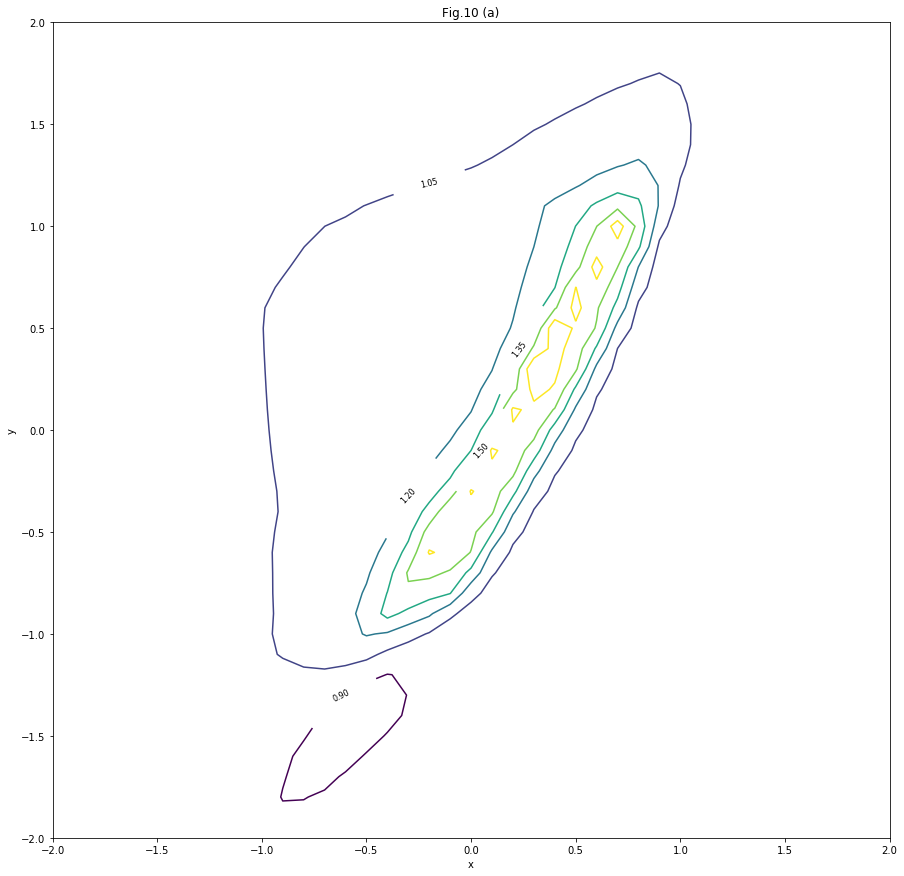

In [66]:
# Plot Figure 10 (a)

def get_m_theta_for_class_1(_px, _py):
    return get_m_theta_k(model, _px, _py, 0)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_1)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (a)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


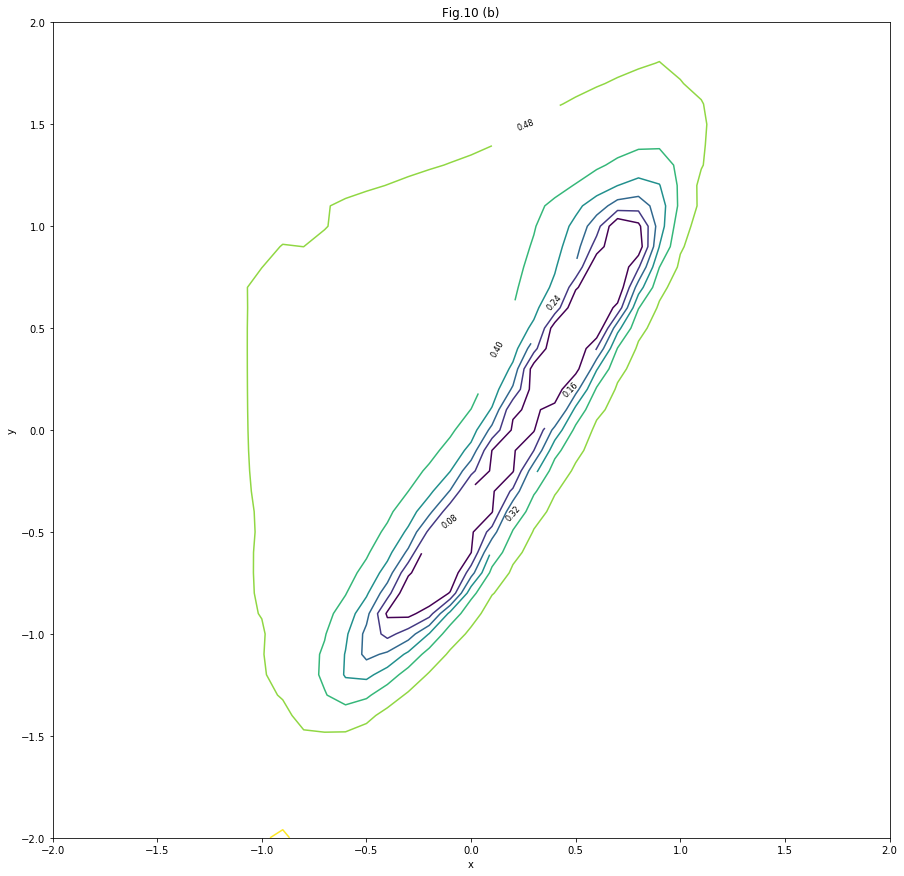

In [67]:
# Plot Figure 10 (a)

def get_m_theta_for_class_2(_px, _py):
    return get_m_theta_k(model, _px, _py, 1)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_2)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (b)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


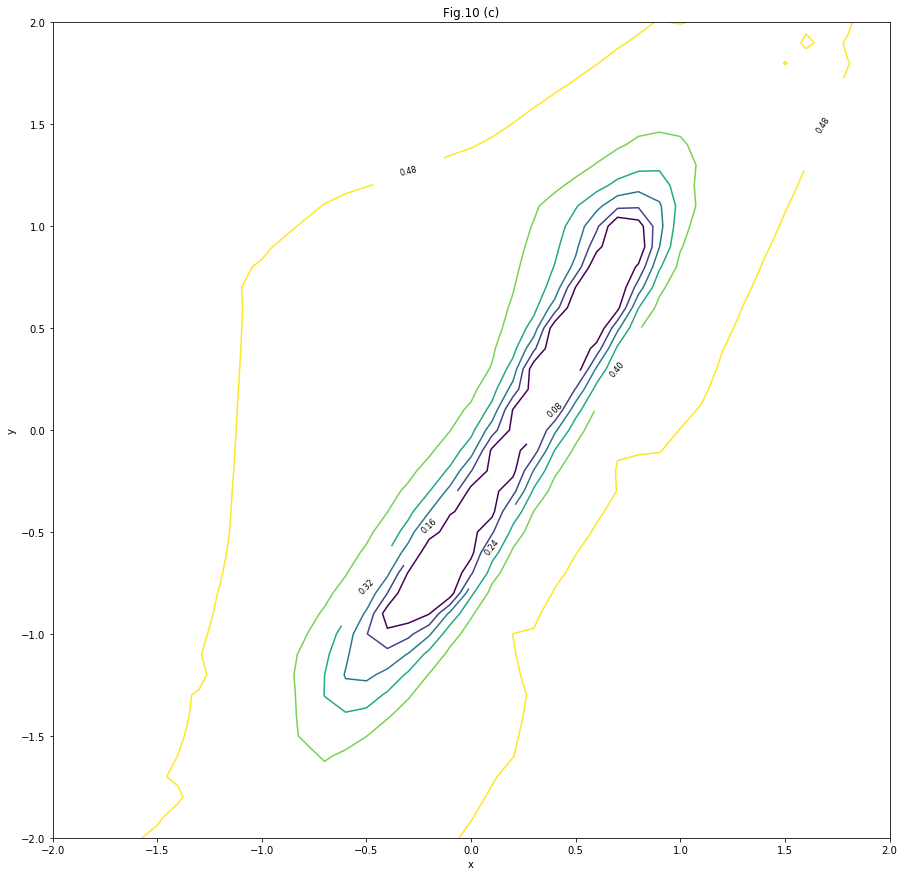

In [68]:
# Plot Figure 10 (a)

def get_m_theta_for_class_3(_px, _py):
    return get_m_theta_k(model, _px, _py, 2)

arr_x = np.arange(-2.0, 2.1, 0.1)
arr_y = np.arange(-2.0, 2.1, 0.1)

_X, _Y = np.meshgrid(arr_x, arr_y)
# https://stackoverflow.com/questions/61899911
Z = np.vectorize(get_m_theta_for_class_3)(_X, _Y)

fig, ax = plt.subplots()
ct = ax.contour(arr_x, arr_y, Z)
ax.clabel(ct, colors='k', fmt='%2.2f', fontsize=8)
ax.set_title('Fig.10 (c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.set_size_inches(15, 15)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()
